# Covid Analysis

# Loading necessary libraries

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset file and retrieving the number of rows and columns in it

In [4]:
covidAnalysis = pd.read_csv('CovidDataset.csv')
covidAnalysis.shape

(270, 7)

# viewing the dataset

In [5]:
covidAnalysis

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


# Viewing the first five snippets of the data

In [6]:
covidAnalysis.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


# To check the column names at one place

In [9]:
covidAnalysis.columns

Index(['Sno', 'Date', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths'],
      dtype='object')

# Viewing the last 5 snippets of the data

In [10]:
covidAnalysis.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0
269,270,21/03/20,West Bengal,3,0,0,0


# To check if the data has any null values

In [11]:
covidAnalysis.isnull().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

# To get the statistical information of the dataset

In [7]:
covidAnalysis.describe()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,5.551852,1.329630,0.603704,0.092593
std,78.086491,8.339625,3.587288,1.461522,0.290399
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,68.250000,1.000000,0.000000,0.000000,0.000000
50%,135.500000,3.000000,0.000000,0.000000,0.000000
75%,202.750000,6.000000,0.000000,0.000000,0.000000
max,270.000000,60.000000,14.000000,9.000000,1.000000


# count of total cases

In [39]:
#covidAnalysis.drop(['Sno'],axis=1,inplace = True)
covidAnalysis['Cases']=covidAnalysis['ConfirmedIndianNational']+covidAnalysis['ConfirmedForeignNational']+covidAnalysis['Cured']
totalCases = covidAnalysis['Cases'].sum()
print("Total confirmed cases till date (21/03/2020) are: ",totalCases)

Total confirmed cases till date (21/03/2020) are:  2021


In [40]:
covidAnalysis

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Cases
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
265,21/03/20,Jammu and Kashmir,4,0,0,0,4
266,21/03/20,Ladakh,13,0,0,0,13
267,21/03/20,Uttar Pradesh,23,1,9,0,33
268,21/03/20,Uttarakhand,3,0,0,0,3


# To get the cases per day using groupby function

In [42]:
#covidAnalysis.drop(['Sno'],axis=1,inplace = True)
total_cases_per_day=covidAnalysis.groupby(by=['Date'],sort = False).sum()
total_cases_per_day

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3
04/02/20,3,0,0,0,3
05/02/20,3,0,0,0,3
06/02/20,3,0,0,0,3
07/02/20,3,0,0,0,3


# Grouping statewise for better visualization

In [49]:
stateswise = covidAnalysis.groupby('State/UnionTerritory')[['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths']].sum()
stateswise

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
State/UnionTerritory,,,,
Andhra Pradesh,15,0,0,0
Chandigarh,1,0,0,0
Chattisgarh,1,0,0,0
Chhattisgarh,2,0,0,0
Delhi,129,4,22,8
Gujarat,12,0,0,0
Haryana,13,168,0,0
Himachal Pradesh,2,0,0,0
Jammu and Kashmir,4,0,0,0


In [48]:
stateswise.shape

(27, 4)

# Plotting a pie chart of the data 

In [14]:
import plotly_express as px
fig=px.pie(covidAnalysis ,values ='Cases', names='State/UnionTerritory')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [35]:
total_cases_per_day['Cases'].max()

306

In [36]:
total_cases_per_day['Cases'].idxmax()

'21/03/20'

In [37]:
total_cases_per_day['Cases'].idxmin()

'30/01/20'

# To get count of cases of same state using value_counts function

In [19]:
covidAnalysis['State/UnionTerritory'].value_counts()

Kerala                                  52
Telengana                               20
Delhi                                   20
Rajasthan                               19
Uttar Pradesh                           18
Haryana                                 18
Tamil Nadu                              15
Union Territory of Ladakh               14
Karnataka                               13
Maharashtra                             13
Punjab                                  13
Union Territory of Jammu and Kashmir    12
Andhra Pradesh                          10
Uttarakhand                              7
Odisha                                   6
West Bengal                              4
Pondicherry                              2
Union Territory of Chandigarh            2
Chhattisgarh                             2
Gujarat                                  2
Puducherry                               2
Chattisgarh                              1
Himachal Pradesh                         1
Madhya Prad

# sum of cases column wise to get count of confirmed cases ,cured ,deaths etc individually  

In [25]:
total_cases_per_day.sum(axis=0)

ConfirmedIndianNational     1499
ConfirmedForeignNational     359
Cured                        163
Deaths                        25
dtype: int64

# Visualization using bar graph 

<IPython.core.display.Javascript object>


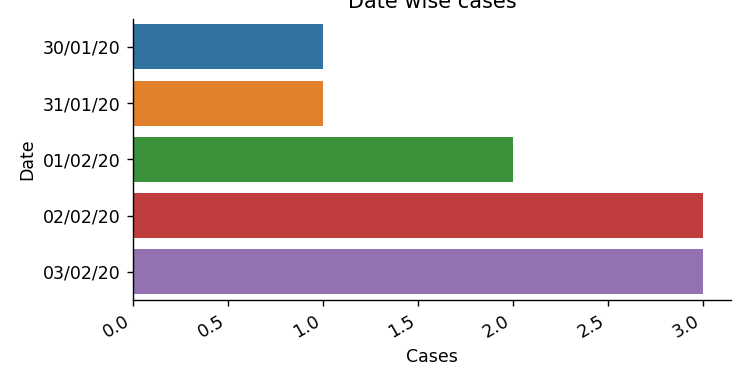

In [50]:
data1 = covidAnalysis.head()
x = sn.catplot(data=data1, y='Date', x='Cases',kind = 'bar', orient="h", height=3,aspect=2)
x.fig.autofmt_xdate()
plt.title("Date wise cases")
plt.show()

# Modelling the solution which shows exponential solution

In [56]:
t = 26 #(given)
P_o = 31 # initial value taken
r = ((33-t)/t)
B = np.exp(r*t)
P_t = P_o * B
print("The exponential trend shows a predicted forecast value for 26 days and  having initial value 31 is :",P_t)

The exponential trend shows a predicted forecast value for 26 days and  having initial value 31 is : 33995.627911282216
